SSE 5650084682897.0
-0.22858422 + 4830.01448142·x
-0.22858422 + 4830.01448142·x


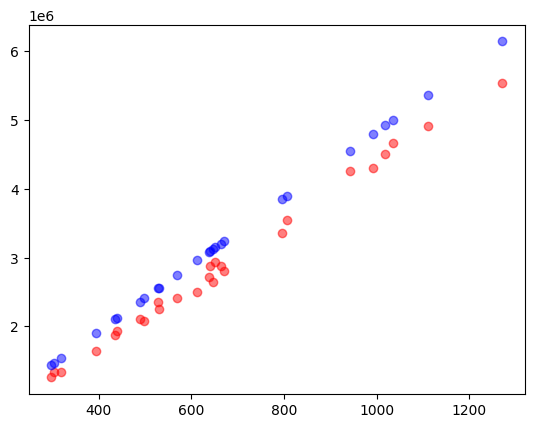

SSE 3142856918921.16
-0.39836013 + 4705.00743452·x
-0.39836013 + 4705.00743452·x


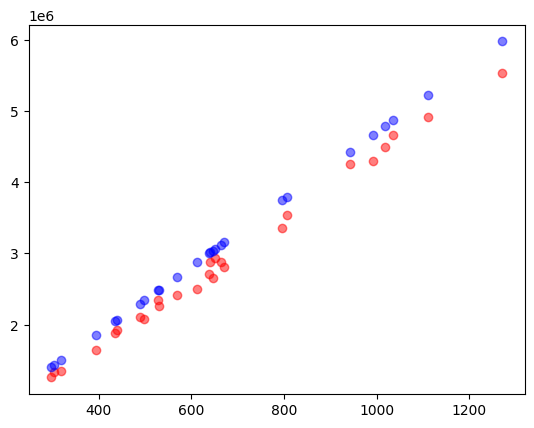

SSE 1786921682912.2075
-0.52488852 + 4613.07747597·x
-0.52488852 + 4613.07747597·x


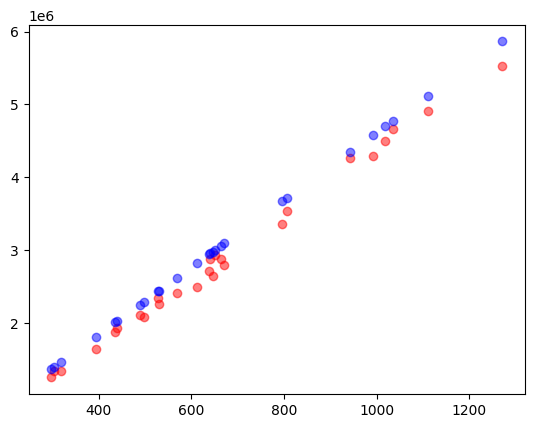

SSE 1053617595909.4258
-0.61961275 + 4545.47234958·x
-0.61961275 + 4545.47234958·x


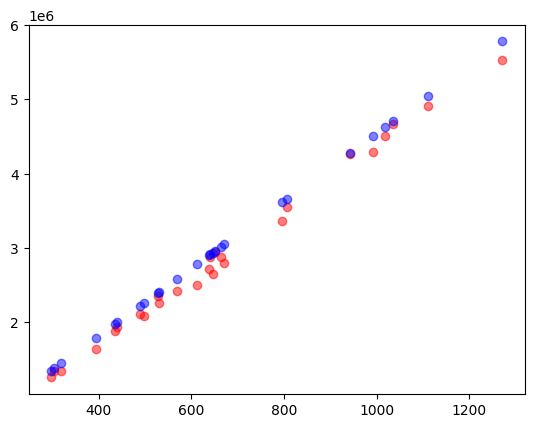

SSE 657039005073.409
-0.69094826 + 4495.75566164·x
-0.69094826 + 4495.75566164·x


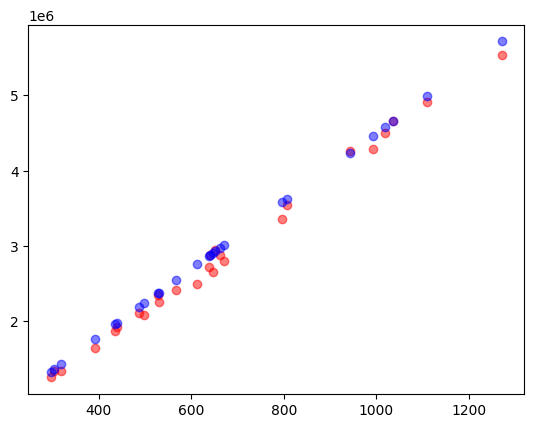

In [ ]:
#Gradient Descent Method

import pip
import pandas as pd
import numpy as np
from numpy import linalg
import statistics as stats
import matplotlib.pyplot as plt
from scipy.linalg import svd
import numpy.polynomial.polynomial as poly
data = pd.read_csv("Schoolsdata.csv")
print(data)

x=np.array(data['Recipients'])
y=np.array(data['$ of Loans '])
print(x)
print(y)

#Initial guesses for a0 and a1
a0=0
a1=5000
#Learning rate
r=0.00000001
#Interpolating function
fhat=poly.Polynomial([a0, a1])
yhat=fhat(x)
plt.scatter(x,y,alpha=.5, color="red")
plt.scatter(x,yhat, alpha=.5, color="blue")
fhat=poly.Polynomial([a0, a1])
print(fhat)


plt.show()
for i in range(0,5):
  #Putting the x values into the fhat model
  yhat=fhat(x)
  SSE=np.sum((y-yhat)**2)
  print("SSE", SSE)
  #Total gradient for a0: -2(y-yhat)
  grad_a0=np.sum(-2*(y-yhat))
  #Total gradient for a1: -2x(y-yhat)
  grad_a1=np.sum(-2*x*(y-yhat))
  a0=a0-r*grad_a0
  a1=a1-r*grad_a1
  fhat=poly.Polynomial([a0, a1])
  yhat=fhat(x)
  print(fhat)
  plt.scatter(x,y,alpha=.5, color="red")
  plt.scatter(x,yhat, alpha=.5, color="blue")
  fhat=poly.Polynomial([a0, a1])
  print(fhat)
  plt.show()

#6*10^6 = 6 million
#6million/1200
#First guess: Slope- 6mil/1200
#Intercept: 0

                             School  Recipients  $ of Loans 
0                   DUKE UNIVERSITY         671      2802954
1               CAMPBELL UNIVERSITY        1271      5530497
2            WAKE FOREST UNIVERSITY         646      2649903
3             HIGH POINT UNIVERSITY        1036      4663380
4                   ELON UNIVERSITY        1019      4502840
5                WINGATE UNIVERSITY        1110      4915177
6           GARDNER-WEBB UNIVERSITY         942      4262874
7              METHODIST UNIVERSITY         613      2499017
8           LENOIR-RHYNE UNIVERSITY         806      3545106
9         UNIVERSITY OF MOUNT OLIVE         992      4293767
10   QUEENS UNIVERSITY OF CHARLOTTE         641      2880062
11                 MEREDITH COLLEGE         652      2942065
12            BELMONT ABBEY COLLEGE         530      2258280
13                CHOWAN UNIVERSITY         796      3362692
14                   BARTON COLLEGE         639      2716390
15              PFEIFFER

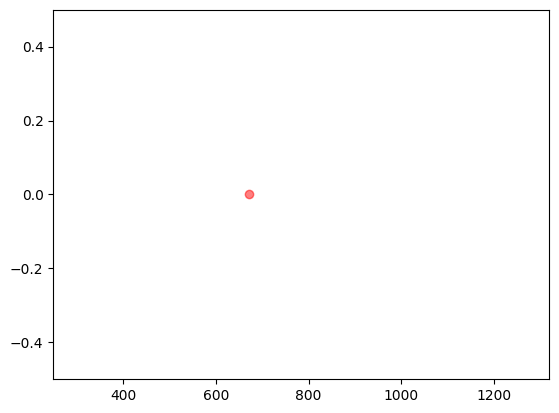

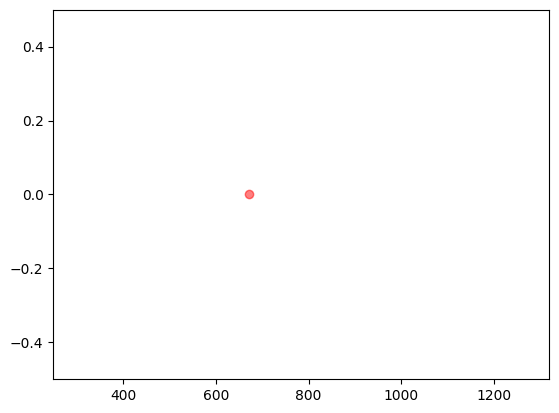

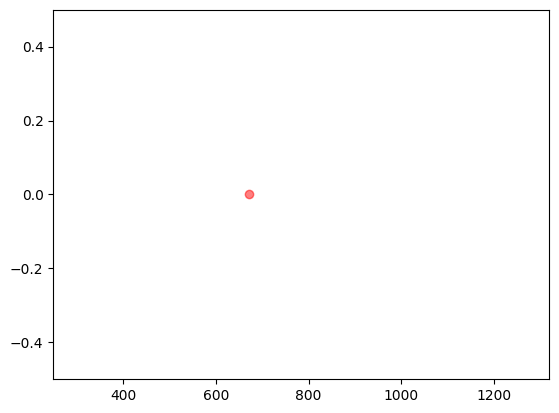

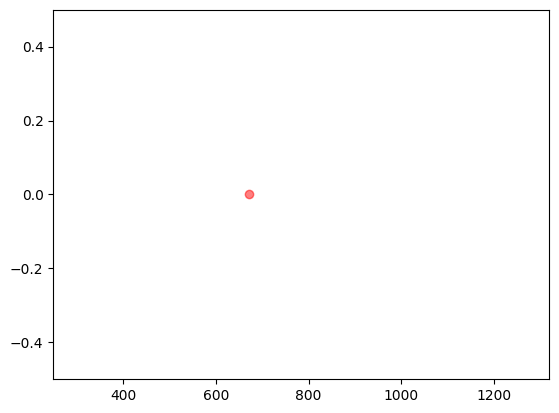

In [ ]:
#Newton's Interpolant Using Vandermonde

import pip
import pandas as pd
import numpy as np
from numpy import linalg
import statistics as stats
import matplotlib.pyplot as plt
import scipy.linalg as la
from scipy.linalg import lu
data = pd.read_csv("Schoolsdata.csv")
print(data)

x=np.array(data['Recipients'])
y=np.array(data['$ of Loans '])

A=np.zeros([len(x),26])#matrix of zeros, # of rows is related to number of data points
A[:,0]=x[:] #zero column put x's
A[:,1]=y[:] #first column put y's


for j in range(2,26):
  for i in range(j-1,len(x)):
   A[i,j]=(A[i,j-1]-A[i-1,j-1])/(A[i,0]-A[i-(j-1),0])

print(A)


from sympy import symbols
t=symbols('t')

fhatlist=[0]
for i in range(0,4):
  temp=1
  for j in range(0,i+1):
      temp=(t-x[j])*temp
  fhat=A[i,j+1]*temp
  fhatlist=np.append(fhatlist,fhatlist[i]+fhat)
fhatlist=np.delete(fhatlist,0)
print(fhatlist)

for k in range(0,4):
  xpoints=np.array([i/10 for i in range (4000,12000)])
  ypoints=np.array([fhatlist[k].subs(t,xpoints[i]) for i in range (0,len(xpoints))])
  plt.scatter(xpoints,ypoints,alpha=.5,color="red")
  plt.scatter(x,y,alpha=.5,color="blue")
  #plt.ylim([-0.5, 0.5])
  plt.show()